In [1]:
# ==========================================
# Healthcare Readmission Analysis - Day 1
# Dataset: Diabetes 130-US Hospitals
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

print("Libraries loaded successfully")


Libraries loaded successfully


In [2]:
# ==========================================
# Step 2: Load the Healthcare Dataset
# ==========================================

file_path = "../data/diabetic_data.csv"

df = pd.read_csv(file_path)

print("Dataset loaded successfully")
print("Shape of dataset:", df.shape)


Dataset loaded successfully
Shape of dataset: (101766, 50)


In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
# Check distribution of target variable
df["readmitted"].value_counts()


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [5]:
# ==========================================
# Convert target to binary classification
# 1 = Readmitted within 30 days
# 0 = Otherwise
# ==========================================

df["readmitted_binary"] = df["readmitted"].apply(
    lambda x: 1 if x == "<30" else 0
)

df["readmitted_binary"].value_counts()


readmitted_binary
0    90409
1    11357
Name: count, dtype: int64

In [6]:
df["readmitted_binary"].value_counts()


readmitted_binary
0    90409
1    11357
Name: count, dtype: int64

In [7]:
# Calculate percentage distribution
df["readmitted_binary"].value_counts(normalize=True) * 100


readmitted_binary
0    88.840084
1    11.159916
Name: proportion, dtype: float64

In [8]:
# Check missing values percentage
missing_percentage = df.isnull().mean() * 100

missing_percentage.sort_values(ascending=False).head(15)


max_glu_serum               94.746772
A1Cresult                   83.277322
encounter_id                 0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
dtype: float64

In [9]:
df["max_glu_serum"].value_counts(dropna=False)


max_glu_serum
NaN     96420
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [10]:
# Replace NaN with meaningful category
df["max_glu_serum"] = df["max_glu_serum"].fillna("NotTested")

df["max_glu_serum"].value_counts()


max_glu_serum
NotTested    96420
Norm          2597
>200          1485
>300          1264
Name: count, dtype: int64

In [11]:
# Calculate missing percentage again
missing_percentage = df.isnull().mean() * 100

# Show columns with more than 40% missing
high_missing = missing_percentage[missing_percentage > 40].sort_values(ascending=False)

high_missing


A1Cresult    83.277322
dtype: float64

In [12]:
df["A1Cresult"] = df["A1Cresult"].fillna("NotTested")

df["A1Cresult"].value_counts()


A1Cresult
NotTested    84748
>8            8216
Norm          4990
>7            3812
Name: count, dtype: int64

In [13]:
df["weight"].value_counts(dropna=False)


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [14]:
df.drop(columns=["weight"], inplace=True)


In [15]:
df.drop(columns=["max_glu_serum", "A1Cresult"], inplace=True)


In [16]:
df.isnull().mean().sort_values(ascending=False).head(10)



encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
dtype: float64

In [17]:
(df == "?").mean().sort_values(ascending=False).head(10)


medical_specialty           0.490822
payer_code                  0.395574
race                        0.022336
diag_3                      0.013983
diag_2                      0.003518
diag_1                      0.000206
age                         0.000000
encounter_id                0.000000
admission_source_id         0.000000
discharge_disposition_id    0.000000
dtype: float64

In [18]:
# Drop high-missing columns
df = df.drop(columns=["medical_specialty", "payer_code"])

# Replace '?' with 'Unknown'
df.replace("?", "Unknown", inplace=True)


In [19]:
(df == "?").sum().sum()


np.int64(0)

In [20]:
# Convert age ranges to midpoint numbers

df["age"] = df["age"].str.replace("[", "", regex=False)
df["age"] = df["age"].str.replace(")", "", regex=False)

df["age"] = df["age"].str.split("-").apply(lambda x: (int(x[0]) + int(x[1])) / 2)


In [21]:
df["age"].head()


0     5.0
1    15.0
2    25.0
3    35.0
4    45.0
Name: age, dtype: float64

In [22]:
features = [
    "age",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses"
]

X = df[features]
y = df["readmitted_binary"]


In [23]:
X.head()


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,5.0,1,41,0,1,0,0,0,1
1,15.0,3,59,0,18,0,0,0,9
2,25.0,2,11,5,13,2,0,1,6
3,35.0,2,44,1,16,0,0,0,7
4,45.0,1,51,0,8,0,0,0,5


In [24]:
y.value_counts()


readmitted_binary
0    90409
1    11357
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (81412, 9)
Test size: (20354, 9)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[18048    35]
 [ 2239    32]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.48      0.01      0.03      2271

    accuracy                           0.89     20354
   macro avg       0.68      0.51      0.48     20354
weighted avg       0.84      0.89      0.84     20354



In [29]:
from sklearn.linear_model import LogisticRegression

# Create model with class balancing
model = LogisticRegression(max_iter=1000, class_weight="balanced")

# Train model
model.fit(X_train, y_train)

print("Model retrained with class balancing")


Model retrained with class balancing


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12793  5290]
 [ 1174  1097]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     18083
           1       0.17      0.48      0.25      2271

    accuracy                           0.68     20354
   macro avg       0.54      0.60      0.53     20354
weighted avg       0.83      0.68      0.74     20354



In [31]:
y_probs = model.predict_proba(X_test)[:, 1]


In [32]:
import numpy as np

y_pred_custom = (y_probs >= 0.3).astype(int)


In [33]:
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[   44 18039]
 [    0  2271]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     18083
           1       0.11      1.00      0.20      2271

    accuracy                           0.11     20354
   macro avg       0.56      0.50      0.10     20354
weighted avg       0.90      0.11      0.03     20354



In [34]:
df["age"].value_counts().sort_index()

age
5.0       161
15.0      691
25.0     1657
35.0     3775
45.0     9685
55.0    17256
65.0    22483
75.0    26068
85.0    17197
95.0     2793
Name: count, dtype: int64

In [35]:
df = df.drop(columns=["encounter_id", "patient_nbr"])

In [36]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))

Numeric columns: 13
Categorical columns: 31


In [37]:
(df == "?").sum().sort_values(ascending=False)

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipto

In [38]:
df.isna().sum().sort_values(ascending=False).head(10)

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
dtype: int64

In [39]:
cols_to_drop = [
    "weight",               # mostly missing / unreliable
    "payer_code",           # billing info, not clinical
    "medical_specialty",    # too noisy, high cardinality
    "diag_1", "diag_2", "diag_3"  # ICD codes too granular for now
]

df = df.drop(columns=cols_to_drop)

KeyError: "['weight', 'payer_code', 'medical_specialty'] not found in axis"

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'readmitted_binary'],
      dtype='object')

In [ ]:
cols_to_drop = [
    "weight",
    "payer_code",
    "medical_specialty",
    "diag_1", "diag_2", "diag_3"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
df.shape

(101766, 41)

In [ ]:
df["readmitted_binary"].value_counts(normalize=True)

readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
binary_cols = []

for col in categorical_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)
        print(col, df[col].unique())

acetohexamide ['No' 'Steady']
tolbutamide ['No' 'Steady']
troglitazone ['No' 'Steady']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']
change ['No' 'Ch']
diabetesMed ['No' 'Yes']


In [ ]:
binary_mapping = {
    "Yes": 1,
    "No": 0,
    "Ch": 1,
    "No": 0,
    "Male": 1,
    "Female": 0
}

for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

In [ ]:
low_card_cols = [
    "race",
    "A1Cresult",
    "max_glu_serum",
    "insulin",
    "metformin"
]

df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

KeyError: "['A1Cresult', 'max_glu_serum'] not in index"

In [ ]:
[col for col in low_card_cols if col in df.columns]

['race', 'insulin', 'metformin']

In [ ]:
valid_low_card_cols = [col for col in low_card_cols if col in df.columns]

df = pd.get_dummies(df, columns=valid_low_card_cols, drop_first=True)

In [ ]:
df.shape

(101766, 49)

In [ ]:
df.isna().sum().sum()

np.int64(44)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=["readmitted_binary"])
y = df["readmitted_binary"]

# Identify numeric columns again (after encoding)
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Female'

In [ ]:
X.select_dtypes(include=["object"]).columns

Index(['gender', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'readmitted'],
      dtype='object')

In [ ]:
remaining_cat_cols = X.select_dtypes(include=["object"]).columns

X = pd.get_dummies(X, columns=remaining_cat_cols, drop_first=True)

In [ ]:
X.select_dtypes(include=["object"]).shape

(101766, 0)

In [ ]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Female'

In [ ]:
# Recreate X and y from df
X = df.drop(columns=["readmitted_binary"])
y = df["readmitted_binary"]

In [ ]:
X.select_dtypes(include=["object"]).columns

Index(['gender', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'readmitted'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X.isna().sum().sort_values(ascending=False).head(10)

tolbutamide                 23
glipizide-metformin         13
troglitazone                 3
metformin-rosiglitazone      2
acetohexamide                1
glimepiride-pioglitazone     1
metformin-pioglitazone       1
num_procedures               0
num_lab_procedures           0
time_in_hospital             0
dtype: int64

In [ ]:
X = X.fillna(0)

In [ ]:
X.isna().sum().sum()

np.int64(0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X.dtypes[X.dtypes == "object"]

Series([], dtype: object)

In [ ]:
X.isna().sum().sum()

np.int64(0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X.dtypes[X.dtypes == "object"]

Series([], dtype: object)

In [ ]:
X.isna().sum().sort_values(ascending=False).head(10)

age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(28), np.int64(16))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

In [ ]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18083     0]
 [    0  2271]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18083
           1       1.00      1.00      1.00      2271

    accuracy                           1.00     20354
   macro avg       1.00      1.00      1.00     20354
weighted avg       1.00      1.00      1.00     20354



In [ ]:
leakage_cols = [
    "readmitted",
    "readmitted_binary"
]

X = X.drop(columns=[c for c in leakage_cols if c in X.columns])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [ ]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18083     0]
 [    0  2271]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18083
           1       1.00      1.00      1.00      2271

    accuracy                           1.00     20354
   macro avg       1.00      1.00      1.00     20354
weighted avg       1.00      1.00      1.00     20354



In [40]:
X.columns.tolist()

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [41]:
# Double-check missing values
X.isna().sum()

age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [42]:
X = X.fillna(X.median())

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12788  5295]
 [ 1174  1097]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     18083
           1       0.17      0.48      0.25      2271

    accuracy                           0.68     20354
   macro avg       0.54      0.60      0.53     20354
weighted avg       0.83      0.68      0.74     20354



In [44]:
y_probs = model.predict_proba(X_test)[:, 1]

In [45]:
import numpy as np

y_pred_03 = (y_probs >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))

[[   44 18039]
 [    0  2271]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     18083
           1       0.11      1.00      0.20      2271

    accuracy                           0.11     20354
   macro avg       0.56      0.50      0.10     20354
weighted avg       0.90      0.11      0.03     20354



In [46]:
y_probs = model.predict_proba(X_test)[:, 1]

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

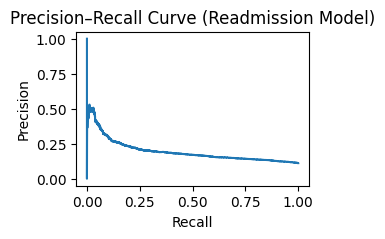

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,2))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Readmission Model)")
plt.show()

In [50]:
import numpy as np

# Find threshold where recall is closest to 0.80
target_recall = 0.80
idx = np.argmin(np.abs(recall - target_recall))

chosen_threshold = thresholds[idx]
chosen_precision = precision[idx]
chosen_recall = recall[idx]

chosen_threshold, chosen_precision, chosen_recall

(np.float64(0.433323325964893),
 np.float64(0.13750567579839565),
 np.float64(0.8000880669308674))

In [51]:
y_pred_custom = (y_probs >= chosen_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[[ 6686 11397]
 [  454  1817]]
              precision    recall  f1-score   support

           0       0.94      0.37      0.53     18083
           1       0.14      0.80      0.23      2271

    accuracy                           0.42     20354
   macro avg       0.54      0.58      0.38     20354
weighted avg       0.85      0.42      0.50     20354



In [52]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance.head(10)

,Feature,Coefficient
7,number_inpatient,0.294789
6,number_emergency,0.060623
8,number_diagnoses,0.043805
1,time_in_hospital,0.026340
4,num_medications,0.007060
0,age,0.004390
2,num_lab_procedures,0.000122
5,number_outpatient,-0.005791
3,num_procedures,-0.024049
